In [5]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

In [3]:
def check(c):
    v = 40
    g = 9.8
    t = 10
    m = 68.1
    s = -1*(c/m)*t
    return v - ((g*m)/c)*(1-math.e**(s))

In [29]:
eps = 10**(-6)

In [4]:
def method(a,b):
    C = (a+b)/2
    pr = check(C)
    arr = [100,C]
    i = 1
    while abs(arr[i-1] - arr[i]) >= eps:
        if abs(check(a)) > abs(check(b)):
            a += ((b-a)/2)
        else:
            b -= ((b-a)/2)
        arr.append((a+b)/2)
        i += 1
    return arr[i]

In [122]:
method(14,15)

14.780203826725483

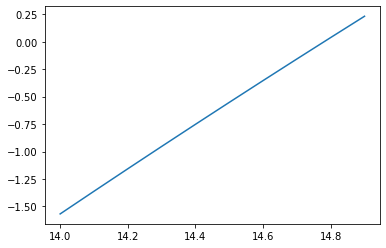

In [8]:
x = np.arange(14,15,0.1)
plt.plot(x,check(x))
plt.show()

# 3 задание

## Метод Ньютона

Сама функция

In [7]:
def fun(x):
    return 4*(1-x**2)- np.exp(x)

Посчитаем производную по определению, симулируя предел стремящийся к нулю

In [8]:
def d_fun(x):
    h = 1e-10 
    return (fun(x+h)-fun(x))/h

In [40]:
def answer(x):
    arr = []
    arr_c = []
    counter = 0
    cur = 0
    while True:
        x = x - fun(x)/d_fun(x)
        counter += 1
        arr_c.append(counter)
        arr.append(fun(x))
        if abs(x - cur) < eps:
            return x,counter,arr,arr_c
        cur = x
answer(0)

(0.7034395711636395,
 8,
 [-52.0855259802284,
  -15.391062483135926,
  -3.557127016455087,
  -0.5065238913737704,
  -0.018874938109575634,
  -3.0325487012650143e-05,
  -9.280931578814489e-11,
  -4.440892098500626e-16],
 [1, 2, 3, 4, 5, 6, 7, 8])

In [10]:
fun(0.7034395711636395)

-4.440892098500626e-16

In [43]:
px.scatter(x=answer(0)[3],y=answer(0)[2]).show()

Если поставить в функцию math.e вместо np.exp, то мы с тем же значением X получим 0 при подставлении в функцию, что я продемонстирировал ниже

In [69]:
def fun_math(x):
    return 4*(1-x**2)- math.e**(x)

def answer_math(x):
    counter = 0
    arr = []
    cur = 0
    while True:
        x = x - fun_math(x)/d_fun(x)
        counter += 1
        if abs(x - cur) < eps:
            return x
        cur = x
answer_math(0)

0.7034395711636395

In [12]:
fun_math(0.7034395711636395)

0.0

## Метод секущих

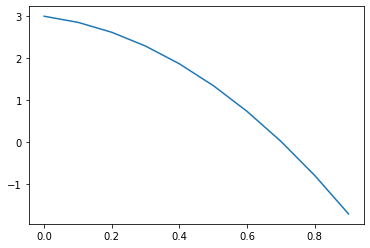

In [13]:
x = np.arange(0,1,0.1)
plt.plot(x,fun(x))
plt.show()

Возьмем промежуток от нуля до одного

In [32]:
def sek(a,b):
    cur = 0
    counter = 0
    arr = []
    arr_c = []
    while True:
        c = a - fun(a)*(a-b)/(fun(a)-fun(b))
        counter += 1
        arr_c.append(counter)
        arr.append(fun(c))
        if abs(c - cur) < eps:
            return(cur,c,arr,arr_c,counter)
        if fun(a)*fun(c) < 0 and c<b:
            b = c
        if fun(b)*fun(c) < 0 and c>a:
            a = c
        cur = c
sek(0,1)

(0.7034388891969822,
 0.7034394582352879,
 [1.209201628790808,
  0.24291640193459063,
  0.041608445813554606,
  0.006929089584065018,
  0.0011484789781954774,
  0.00019020862016194684,
  3.1497861288976026e-05,
  5.215820273907212e-06,
  8.636994190958092e-07],
 [1, 2, 3, 4, 5, 6, 7, 8, 9],
 9)

Отдельно выведем итоговый промежуток и зависимость значения функции от итераций

In [33]:
print(sek(0,1)[0],sek(0,1)[1])

0.7034388891969822 0.7034394582352879


In [41]:
px.scatter(x=sek(0,1)[3],y=sek(0,1)[2]).show()

## Метод Стеффенсена


In [44]:
def steff(a):
    counter = 0
    arr = []
    arr_c = []
    while True:
        c = a - fun(a)**2/(fun(a+fun(a))-fun(a))
        counter += 1
        arr.append(fun(c))
        arr_c.append(counter)
        if abs(c - a) < eps:
            return(c,counter,arr,arr_c)
        a = c
steff(0.5)

(0.7034395711636388,
 6,
 [0.7061799763863947,
  0.2268863263743217,
  0.02709975121981678,
  0.00041414519483096157,
  9.765470521116981e-08,
  5.773159728050814e-15],
 [1, 2, 3, 4, 5, 6])

In [109]:
fun(0.7034395711636389)

5.329070518200751e-15

In [47]:
px.scatter(x=steff(0.5)[3],y=steff(0.5)[2]).show()

Подводя итоги этих трёх методов можно сказать, что метод Стеффенсена работает всего в 6 итераций, остальные методы сработали за 8 и 9 итераций соответственно. Но всё равно не считая количество операций сказать точно про то, какой метод лучше и эффективнее нельзя


## Вторая часть третьего задания

In [50]:
def fun_2(x):
    return x**2 * math.e**x

Производную посчитаем также

In [51]:
def d_fun_2(x):
    h = 1e-10 
    return (fun_2(x+h)-fun_2(x))/h

In [65]:
def answer_2(x):
    arr = []
    cur = 0
    counter = 0
    while True:
        x = x - fun_2(x)/d_fun_2(x)
        if abs(x - cur) < eps:
            return x, fun_2(x),counter
        cur = x
        counter += 1
answer_2(1)

(5.899197231205666e-07, 3.480054850218848e-13, 21)

Утонченный метод будет отличаться от обычного умножением на 2 в формуле каждую итерацию

In [66]:
def answer_m(x):
    arr = []
    arr1 = []
    curr = 0
    counter = 0
    while True:
        x = x - 2*fun_2(x)/d_fun_2(x)
        arr.append(fun_2(x))
        counter += 1
        arr1.append(counter)
        if abs(x - curr) < eps:
            return x,fun_2(x), arr1,arr
        curr = x
answer_m(1)

(5.0183777124385815e-11,
 2.5184114865964126e-21,
 [1, 2, 3, 4, 5],
 [0.15506806517799132,
  0.0023781666504561097,
  1.2277440312428275e-06,
  3.756503869083722e-13,
  2.5184114865964126e-21])

In [61]:
px.scatter(x=answer_m(1)[1],y=answer_m(1)[2]).show()

Видим, что "утонченный" метод Ньютона совершается в меньшее количество итераций и даёт результат Гораздо точнее, чем обычный, но опять же без подсчёта операций нельзя сказать какой быстрее и оптимальнее